In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as scs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer

In [404]:
df = pd.read_csv('data_correlation_gone.csv',index_col = 0)

In [405]:
check_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','distance_from_a_city']

In [406]:
def remove_outliers(df, col, threshold = 2.5):
    zscores = scs.zscore(df[col])
    indices = np.abs(np.where(zscores > threshold))
    return indices[0]


all_indices = []
for col in check_col:
    indices = remove_outliers(df, col, threshold = 2.5)
    all_indices.extend(indices)
all_indices = np.unique(all_indices)

In [407]:
df.reset_index(drop=True,inplace=True)

In [408]:
df.drop(all_indices,axis=0,inplace= True)

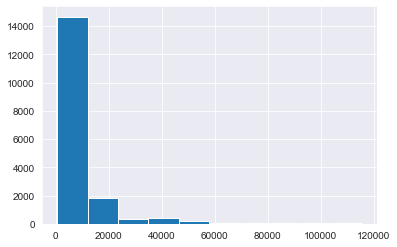

In [409]:
df['sqft_lot'].hist()

In [410]:
# df = df.loc[df['condition']>=3]

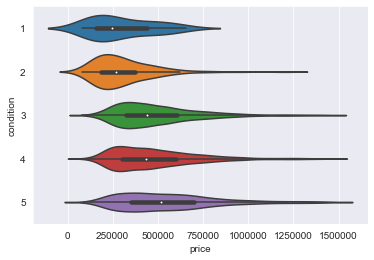

In [411]:
sns.violinplot(x='price', y='condition', data=df, orient='h')
plt.show()

In [412]:
df = df.round({'bathrooms':0})

In [413]:
df['cond1'] = df.condition.apply(lambda x: 1 if x ==1 else 0)
df['cond2'] = df.condition.apply(lambda x: 1 if x ==2 else 0)
df['cond3'] = df.condition.apply(lambda x: 1 if x ==3 else 0)
df['cond4'] = df.condition.apply(lambda x: 1 if x ==4 else 0)
df['cond5'] = df.condition.apply(lambda x: 1 if x ==5 else 0)

In [414]:
df['cond1'].value_counts()

0    17721
1       22
Name: cond1, dtype: int64

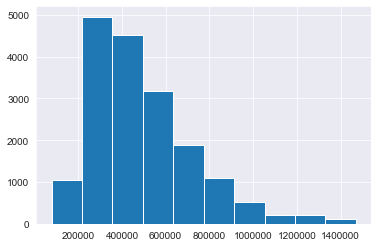

In [415]:
df['price'].hist()

In [416]:
features =  ['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

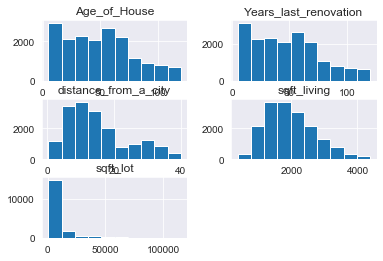

In [417]:
df[features].hist();

In [418]:
df.shape

(17743, 24)

In [419]:
tobox =['sqft_living','Age_of_House', 'Years_last_renovation','distance_from_a_city','sqft_lot']

In [420]:
tobox = ['distance_from_a_city','sqft_lot','sqft_living',]

In [421]:
for feat in tobox:
    df[feat],b = scs.boxcox(df[feat])


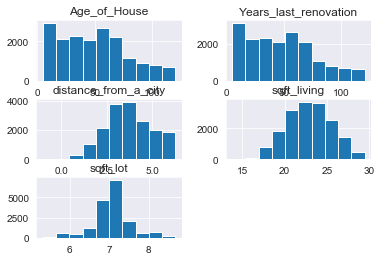

In [422]:
df[features].hist();

In [423]:
def norm_feat(series):
    return (series - series.mean())/series.std()

In [424]:
df['bedbath'] = df['bedrooms']*df['bathrooms']

In [425]:
df['livinglot'] = df['sqft_living']*df['sqft_lot']

In [426]:
norm = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city','Age_of_House',
           'Years_last_renovation','bedbath','livinglot']


In [427]:
for feat in norm:
    df[feat] = norm_feat(df[feat])


In [428]:
# tomodel = ['distance_from_a_city','Years_last_renovation','sqft_living']

In [429]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
       'Age_of_House', 'Years_last_renovation', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'distance_from_airport', 'cond1',
       'cond2', 'cond3', 'cond4', 'cond5', 'bedbath', 'livinglot'],
      dtype='object')

In [430]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'Age_of_House','basement','bedbath','grade']
# outcome = ['price']

In [431]:
x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
           'basement','grade']
outcome = ['price']

In [433]:
x_cols = ['bedrooms', 'bathrooms',  'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 
       'Age_of_House', 'basement', 'biggerliving',
       'biggerlot', 'distance_from_a_city', 'cond1',
       'cond2', 'cond3', 'cond4', 'cond5']

In [372]:
# x_cols = ['bedrooms','bathrooms','sqft_living','sqft_lot','distance_from_a_city',
#            'basement', 'cond3',
#        'cond4', 'cond5']
# outcome = ['price']

In [373]:
X = df[x_cols]
y = df['price']

In [374]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     3060.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:11:28   Log-Likelihood:            -2.3345e+05
No. Observations:               17743   AIC:                         4.669e+05
Df Residuals:                   17727   BIC:                         4.671e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.823e+04   1253.986    -14.535      0.000   -2.07e+04   -1.58e+04
bathrooms             1.393e+04   1322.425     10.531      0.000    1.13e+04    1.65e+04
sqft_living           1.057e+05   2130.021     49.629      0.000    1.02e+05     1.1e+05
sqft_lot              2.261e+04   1396.877     16.186      0.000    1.99e+04    2.53e+04
floors                 2.05e+04   2699.462      7.595      0.000    1.52e+04    2.58e+04
condition             -2.31e+04   3294.890     -7.012      0.000   -2.96e+04   -1.66e+04
grade                 7.675e+04   1493.476     51.388      0.000    7.38e+04    7.97e+04
Age_of_House          3.059e+04   1464.492     20.885      0.000    2.77e+04    3.35e+04
basement             -1.783e+04   2414.909     -7.384      0.000   -2.26e+04   -1.31e+04
biggerliving         -3.135e+04   2315.601    -13.540      0.000   -3.59e+04   -2.68e+04
biggerlot            -8116.2855   2031.046     -3.996      0.000   -1.21e+04   -4135.237
distance_from_a_city -1.133e+05   1178.593    -96.092      0.000   -1.16e+05   -1.11e+05
cond1                -9.137e+04   2.75e+04     -3.319      0.001   -1.45e+05   -3.74e+04
cond2                -9.017e+04   1.14e+04     -7.895      0.000   -1.13e+05   -6.78e+04
cond3                -3.329e+04   3514.530     -9.472      0.000   -4.02e+04   -2.64e+04
cond4                 6146.5475   3139.511      1.958      0.050      -7.200    1.23e+04
cond5                 6.478e+04   5492.799     11.793      0.000     5.4e+04    7.55e+04
==============================================================================
Omnibus:                     3043.524   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8602.959
Skew:                           0.917   Prob(JB):                         0.00
Kurtosis:                       5.877   Cond. No.                     5.09e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.98e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [375]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

17 16
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.823e+04,1253.986,-14.535,0.0,-2.07e+04,-1.58e+04
bathrooms,1.393e+04,1322.425,10.531,0.0,1.13e+04,1.65e+04
sqft_living,1.057e+05,2130.021,49.629,0.0,1.02e+05,1.1e+05
sqft_lot,2.261e+04,1396.877,16.186,0.0,1.99e+04,2.53e+04
floors,2.05e+04,2699.462,7.595,0.0,1.52e+04,2.58e+04


In [376]:
X = df[x_cols]
y= df['price']

In [377]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     3060.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:11:30   Log-Likelihood:            -2.3345e+05
No. Observations:               17743   AIC:                         4.669e+05
Df Residuals:                   17727   BIC:                         4.671e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.823e+04   1253.986    -14.535      0.000   -2.07e+04   -1.58e+04
bathrooms             1.393e+04   1322.425     10.531      0.000    1.13e+04    1.65e+04
sqft_living           1.057e+05   2130.021     49.629      0.000    1.02e+05     1.1e+05
sqft_lot              2.261e+04   1396.877     16.186      0.000    1.99e+04    2.53e+04
floors                 2.05e+04   2699.462      7.595      0.000    1.52e+04    2.58e+04
condition            -2.157e+04   3063.098     -7.041      0.000   -2.76e+04   -1.56e+04
grade                 7.675e+04   1493.476     51.388      0.000    7.38e+04    7.97e+04
Age_of_House          3.059e+04   1464.492     20.885      0.000    2.77e+04    3.35e+04
basement             -1.783e+04   2414.909     -7.384      0.000   -2.26e+04   -1.31e+04
biggerliving         -3.135e+04   2315.601    -13.540      0.000   -3.59e+04   -2.68e+04
biggerlot            -8116.2855   2031.046     -3.996      0.000   -1.21e+04   -4135.237
distance_from_a_city -1.133e+05   1178.593    -96.092      0.000   -1.16e+05   -1.11e+05
cond1                 -9.29e+04    2.8e+04     -3.313      0.001   -1.48e+05   -3.79e+04
cond2                -9.325e+04   1.23e+04     -7.612      0.000   -1.17e+05   -6.92e+04
cond3                 -3.79e+04   3677.092    -10.307      0.000   -4.51e+04   -3.07e+04
cond5                  5.71e+04   5165.988     11.052      0.000     4.7e+04    6.72e+04
==============================================================================
Omnibus:                     3043.524   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8602.959
Skew:                           0.917   Prob(JB):                         0.00
Kurtosis:                       5.877   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [378]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.775744726723476),
 ('bathrooms', 1.974863814812513),
 ('sqft_living', 5.123455772844684),
 ('sqft_lot', 2.203492581984708),
 ('floors', 2.3976043221729753),
 ('condition', 127.57645452144344),
 ('grade', 2.7954063697404576),
 ('Age_of_House', 2.421971852147227),
 ('basement', 1.5465740395029368),
 ('biggerliving', 1.487104839178078),
 ('biggerlot', 1.104784747229406),
 ('distance_from_a_city', 1.568638433417301),
 ('cond1', 1.1011610966525174),
 ('cond2', 1.3181851713742307),
 ('cond3', 9.909811492164659),
 ('cond5', 2.3271260919807655)]

In [379]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5.5]
print(len(vif_scores), len(x_cols))

16 14


In [380]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          2.268e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        11:11:34   Log-Likelihood:                     -2.3350e+05
No. Observations:               17743   AIC:                                  4.670e+05
Df Residuals:                   17729   BIC:                                  4.671e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.939e+04   1243.472    -15.593      0.000   -2.18e+04    -1.7e+04
bathrooms             1.518e+04   1319.212     11.508      0.000    1.26e+04    1.78e+04
sqft_living           1.159e+05   1673.554     69.269      0.000    1.13e+05    1.19e+05
sqft_lot              2.216e+04   1392.321     15.914      0.000    1.94e+04    2.49e+04
floors                1.345e+04   2598.511      5.175      0.000    8352.776    1.85e+04
grade                 6.589e+04    571.184    115.359      0.000    6.48e+04     6.7e+04
Age_of_House           2.94e+04   1367.672     21.499      0.000    2.67e+04    3.21e+04
basement             -2.316e+04   2315.853    -10.000      0.000   -2.77e+04   -1.86e+04
biggerliving         -3.589e+04   2233.498    -16.069      0.000   -4.03e+04   -3.15e+04
biggerlot            -9438.2142   2032.734     -4.643      0.000   -1.34e+04   -5453.857
distance_from_a_city -1.156e+05   1135.836   -101.767      0.000   -1.18e+05   -1.13e+05
cond1                -2.738e+04   2.69e+04     -1.018      0.309   -8.01e+04    2.53e+04
cond2                -4.329e+04   1.08e+04     -4.004      0.000   -6.45e+04   -2.21e+04
cond5                 4.305e+04   3669.114     11.733      0.000    3.59e+04    5.02e+04
==============================================================================
Omnibus:                     3064.153   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8775.165
Skew:                           0.918   Prob(JB):                         0.00
Kurtosis:                       5.915   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [381]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.947
Method:                 Least Squares   F-statistic:                          2.268e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        11:11:36   Log-Likelihood:                     -2.3350e+05
No. Observations:               17743   AIC:                                  4.670e+05
Df Residuals:                   17729   BIC:                                  4.671e+05
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.939e+04   1243.472    -15.593      0.000   -2.18e+04    -1.7e+04
bathrooms             1.518e+04   1319.212     11.508      0.000    1.26e+04    1.78e+04
sqft_living           1.159e+05   1673.554     69.269      0.000    1.13e+05    1.19e+05
sqft_lot              2.216e+04   1392.321     15.914      0.000    1.94e+04    2.49e+04
floors                1.345e+04   2598.511      5.175      0.000    8352.776    1.85e+04
grade                 6.589e+04    571.184    115.359      0.000    6.48e+04     6.7e+04
Age_of_House           2.94e+04   1367.672     21.499      0.000    2.67e+04    3.21e+04
basement             -2.316e+04   2315.853    -10.000      0.000   -2.77e+04   -1.86e+04
biggerliving         -3.589e+04   2233.498    -16.069      0.000   -4.03e+04   -3.15e+04
biggerlot            -9438.2142   2032.734     -4.643      0.000   -1.34e+04   -5453.857
distance_from_a_city -1.156e+05   1135.836   -101.767      0.000   -1.18e+05   -1.13e+05
cond1                -2.738e+04   2.69e+04     -1.018      0.309   -8.01e+04    2.53e+04
cond2                -4.329e+04   1.08e+04     -4.004      0.000   -6.45e+04   -2.21e+04
cond5                 4.305e+04   3669.114     11.733      0.000    3.59e+04    5.02e+04
==============================================================================
Omnibus:                     3064.153   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8775.165
Skew:                           0.918   Prob(JB):                         0.00
Kurtosis:                       5.915   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

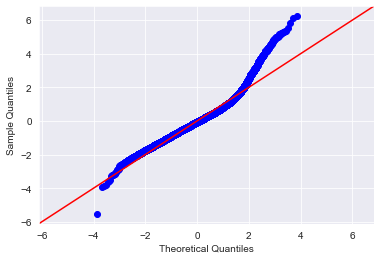

In [382]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


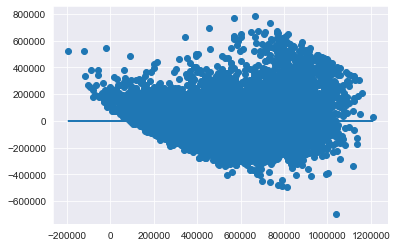

In [383]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

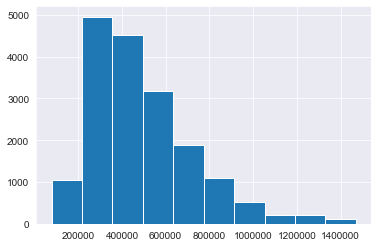

In [384]:
df.price.hist()

In [385]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

0.8 percentile: 664000.0
0.81 percentile: 675000.0
0.82 percentile: 689000.0
0.83 percentile: 700000.0
0.84 percentile: 715000.0
0.85 percentile: 727500.0
0.86 percentile: 744000.0
0.87 percentile: 757769.9999999995
0.88 percentile: 775000.0
0.89 percentile: 790000.0
0.9 percentile: 810000.0
0.91 percentile: 830000.0
0.92 percentile: 851000.0
0.93 percentile: 880000.0
0.94 percentile: 911531.9999999995
0.95 percentile: 950000.0
0.96 percentile: 994000.0
0.97 percentile: 1070000.0
0.98 percentile: 1190000.0
0.99 percentile: 1300000.0


In [280]:
orig_tot = len(df)
df = df[df.price < 1100000.0] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)


Percent removed: 0.027841965845685622


In [281]:
X = df[x_cols]
y = df['price']

In [282]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                          5.118e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        11:08:34   Log-Likelihood:                     -2.2464e+05
No. Observations:               17249   AIC:                                  4.493e+05
Df Residuals:                   17242   BIC:                                  4.494e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.439e+04   1095.439    -13.138      0.000   -1.65e+04   -1.22e+04
bathrooms             4928.0552   1143.203      4.311      0.000    2687.261    7168.849
sqft_living           8.553e+04   1333.332     64.144      0.000    8.29e+04    8.81e+04
sqft_lot              2.653e+04    959.960     27.635      0.000    2.46e+04    2.84e+04
distance_from_a_city -1.134e+05    927.507   -122.277      0.000   -1.15e+05   -1.12e+05
basement             -1.699e+04   1786.192     -9.509      0.000   -2.05e+04   -1.35e+04
grade                 6.439e+04    140.101    459.569      0.000    6.41e+04    6.47e+04
==============================================================================
Omnibus:                      853.929   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1316.034
Skew:                           0.437   Prob(JB):                    1.69e-286
Kurtosis:                       4.033   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [205]:
summary = model.summary()
p_table = summary.tables[1]
p_table = pd.DataFrame(p_table.data)
p_table.columns = p_table.iloc[0]
p_table = p_table.drop(0)
p_table = p_table.set_index(p_table.columns[0])
p_table['P>|t|'] = p_table['P>|t|'].astype(float)
x_cols = list(p_table[p_table['P>|t|'] < 0.05].index)
print(len(p_table), len(x_cols))
print(x_cols[:5])
p_table.head()

7 7
['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'distance_from_a_city']


,coef,std err,t,P>|t|,[0.025,0.975]
,,,,,,
bedrooms,-1.418e+04,1094.523,-12.954,0.0,-1.63e+04,-1.2e+04
bathrooms,4518.0423,1142.495,3.955,0.0,2278.635,6757.450
sqft_living,8.519e+04,1332.732,63.919,0.0,8.26e+04,8.78e+04
sqft_lot,2.667e+04,963.627,27.672,0.0,2.48e+04,2.86e+04
distance_from_a_city,-1.138e+05,929.677,-122.421,0.0,-1.16e+05,-1.12e+05


In [206]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          5.128e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        11:06:05   Log-Likelihood:                     -2.2252e+05
No. Observations:               17090   AIC:                                  4.451e+05
Df Residuals:                   17083   BIC:                                  4.451e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.418e+04   1094.523    -12.954      0.000   -1.63e+04    -1.2e+04
bathrooms             4518.0423   1142.495      3.955      0.000    2278.635    6757.450
sqft_living           8.519e+04   1332.732     63.919      0.000    8.26e+04    8.78e+04
sqft_lot              2.667e+04    963.627     27.672      0.000    2.48e+04    2.86e+04
distance_from_a_city -1.138e+05    929.677   -122.421      0.000   -1.16e+05   -1.12e+05
basement             -1.722e+04   1788.875     -9.625      0.000   -2.07e+04   -1.37e+04
grade                 6.453e+04    140.257    460.053      0.000    6.43e+04    6.48e+04
==============================================================================
Omnibus:                      859.184   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.454
Skew:                           0.441   Prob(JB):                    5.59e-289
Kurtosis:                       4.042   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [207]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[x_cols]
vif = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
list(zip(x_cols,vif))

[('bedrooms', 1.6957501573499132),
 ('bathrooms', 1.7695808745694601),
 ('sqft_living', 2.433660126843756),
 ('sqft_lot', 1.3310570280622467),
 ('distance_from_a_city', 1.2127819178569461),
 ('basement', 1.696967244230949),
 ('grade', 1.6175291093190243)]

In [208]:
vif_scores = list(zip(x_cols, vif))
x_cols = [x for x,vif in vif_scores if vif < 5]
print(len(vif_scores), len(x_cols))

7 7


In [209]:
X = df[x_cols]
y= df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                          5.128e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        11:06:08   Log-Likelihood:                     -2.2252e+05
No. Observations:               17090   AIC:                                  4.451e+05
Df Residuals:                   17083   BIC:                                  4.451e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.418e+04   1094.523    -12.954      0.000   -1.63e+04    -1.2e+04
bathrooms             4518.0423   1142.495      3.955      0.000    2278.635    6757.450
sqft_living           8.519e+04   1332.732     63.919      0.000    8.26e+04    8.78e+04
sqft_lot              2.667e+04    963.627     27.672      0.000    2.48e+04    2.86e+04
distance_from_a_city -1.138e+05    929.677   -122.421      0.000   -1.16e+05   -1.12e+05
basement             -1.722e+04   1788.875     -9.625      0.000   -2.07e+04   -1.37e+04
grade                 6.453e+04    140.257    460.053      0.000    6.43e+04    6.48e+04
==============================================================================
Omnibus:                      859.184   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1327.454
Skew:                           0.441   Prob(JB):                    5.59e-289
Kurtosis:                       4.042   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

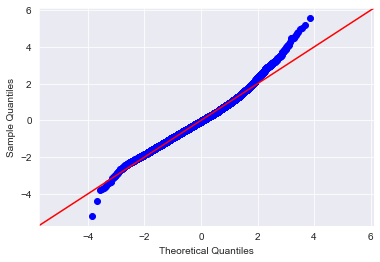

In [210]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


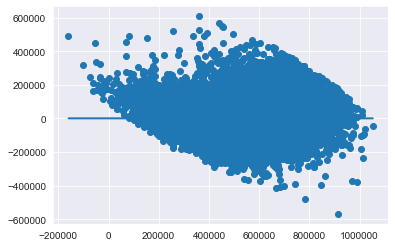

In [211]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

0.8 percentile: 640000.0
0.81 percentile: 650000.0
0.82 percentile: 660000.0
0.83 percentile: 675000.0
0.84 percentile: 685000.0
0.85 percentile: 699122.2
0.86 percentile: 710000.0
0.87 percentile: 725000.0
0.88 percentile: 738000.0
0.89 percentile: 750000.0
0.9 percentile: 765000.0
0.91 percentile: 781000.0
0.92 percentile: 800000.0
0.93 percentile: 820000.0
0.94 percentile: 840000.0
0.95 percentile: 862500.0
0.96 percentile: 891939.9999999987
0.97 percentile: 925000.0
0.98 percentile: 960000.0
0.99 percentile: 1000000.0


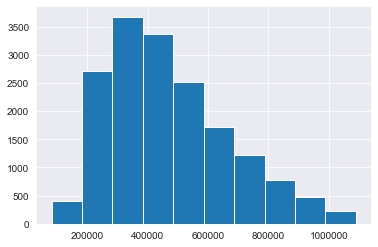

In [212]:
for i in range(80,100):
    q = i/100
    print("{} percentile: {}".format(q, df.price.quantile(q=q)))

df.price.hist()

In [213]:
df = df[df.price <= 950000.0]


In [214]:
X =df[x_cols]
y=df['price']
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                          5.225e+04
Date:                Thu, 04 Jun 2020   Prob (F-statistic):                        0.00
Time:                        11:06:22   Log-Likelihood:                     -2.1682e+05
No. Observations:               16719   AIC:                                  4.336e+05
Df Residuals:                   16712   BIC:                                  4.337e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bedrooms             -1.293e+04   1053.746    -12.266      0.000    -1.5e+04   -1.09e+04
bathrooms             2293.9684   1110.195      2.066      0.039     117.868    4470.068
sqft_living           7.993e+04   1289.502     61.985      0.000    7.74e+04    8.25e+04
sqft_lot              2.503e+04    925.305     27.055      0.000    2.32e+04    2.68e+04
distance_from_a_city -1.081e+05    900.084   -120.109      0.000    -1.1e+05   -1.06e+05
basement             -1.563e+04   1721.132     -9.081      0.000    -1.9e+04   -1.23e+04
grade                 6.366e+04    135.738    469.022      0.000    6.34e+04    6.39e+04
==============================================================================
Omnibus:                      547.578   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              766.793
Skew:                           0.347   Prob(JB):                    3.11e-167
Kurtosis:                       3.787   Cond. No.                         16.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

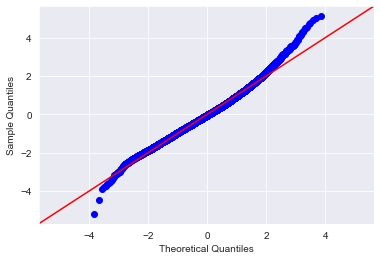

In [215]:
fig = sm.graphics.qqplot(model.resid, dist=scs.norm, line='45', fit=True)


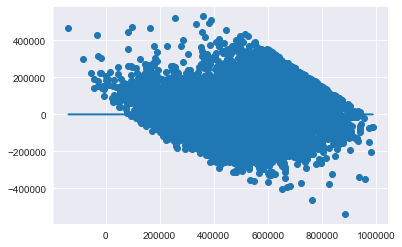

In [216]:
plt.scatter(model.predict(X), model.resid)
plt.plot(model.predict(X), [0 for i in range(len(df))])

In [217]:
def plot_residuals(resids):
    plt.hist(resids)
    plt.title("Residuals")
    plt.show()
    
    xspace = np.linspace(0, 1, len(resids))
    plt.scatter(xspace, resids)
    plt.title("resids")
    plt.hlines(0, xmin=0, xmax=1)
    plt.show()

In [218]:
residuals = model.resid

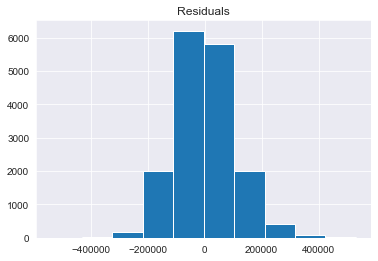

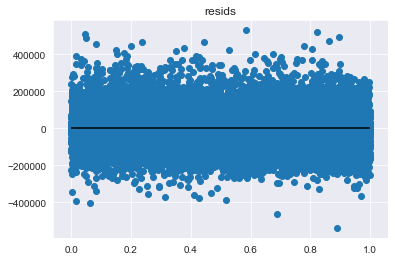

In [219]:
plot_residuals(residuals)

In [220]:
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score

In [386]:
ols = LinearRegression(fit_intercept=False, normalize=False, n_jobs=-1)

In [387]:
cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
cv20_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5_scores,cv10_scores,cv20_scores

(0.7178458237284389, 0.7171922897199852, 0.7174714554955781)

In [388]:
cv5mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=5, n_jobs=-1) )
cv10mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=10, n_jobs=-1) )
cv20mse_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_squared_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mse_scores,cv10mse_scores,cv20mse_scores

(-15866454232.7869, -15873277722.749594, -15851068159.684677)

In [389]:
cv5mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-92841.9686354535, -92862.88228379081, -92782.6631173845)

In [390]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7189258945625647

In [391]:
def make_ols_sklearn(X, y, test_size=0.20, fit_intercept=False, standardize=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    if standardize:
        ss = StandardScaler()
        ss.fit(X_train)
        X_train = ss.transform(X_train)
        X_test = ss.transform(X_test)
    ols = LinearRegression(fit_intercept=fit_intercept, normalize=False)
    ols.fit(X_train, y_train)
    train_score = ols.score(X_train, y_train)
    test_score = ols.score(X_test, y_test)
    cv5_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=5, n_jobs=-1) )
    cv10_scores = np.mean(cross_val_score(ols, X, y, scoring='r2', cv=10, n_jobs=-1) )
    cvmse_5 = np.mean(cross_val_score(ols,X , y, cv=5, scoring='neg_mean_squared_error'))
    cvmse_10 = np.mean(cross_val_score(ols,X, y, cv=10, scoring='neg_mean_squared_error'))
    print(f"train R2 score = {train_score}")
    print(f"test R2 score = {test_score}")
    print(f"cv5 R2 score = {cv5_scores}")
    print(f"cv10 R2 score = {cv10_scores}")
    print(f"cv5 MSE score = {cvmse_5}")
    print(f"cv10  MSE score = {cvmse_10}")

    return ols

In [392]:
make_ols_sklearn(X, y)

train R2 score = 0.7189843529146949
test R2 score = 0.7222160410264151
cv5 R2 score = 0.7178458237284389
cv10 R2 score = 0.7171922897199852
cv5 MSE score = -15866454232.786896
cv10  MSE score = -15873277722.749594


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [393]:
make_ols_sklearn(X, y)

train R2 score = 0.721057258964097
test R2 score = 0.7133533751900061
cv5 R2 score = 0.7178458237284389
cv10 R2 score = 0.7171922897199852
cv5 MSE score = -15866454232.786896
cv10  MSE score = -15873277722.749594


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [291]:
residuals = model.resid

In [292]:
resid = pd.DataFrame(df['price'])

In [293]:
resid['residuals']  = residuals

In [294]:
resid

,price,residuals
0,538000.0,18176.838716
1,180000.0,-42174.983257
2,604000.0,140390.607801
3,510000.0,-11791.279102
5,257500.0,6796.231604
...,...,...
19216,475000.0,-5282.847641
19217,360000.0,-94516.290807
19218,400000.0,-174330.555108
19219,402101.0,-91818.977015


In [295]:
import seaborn as sns

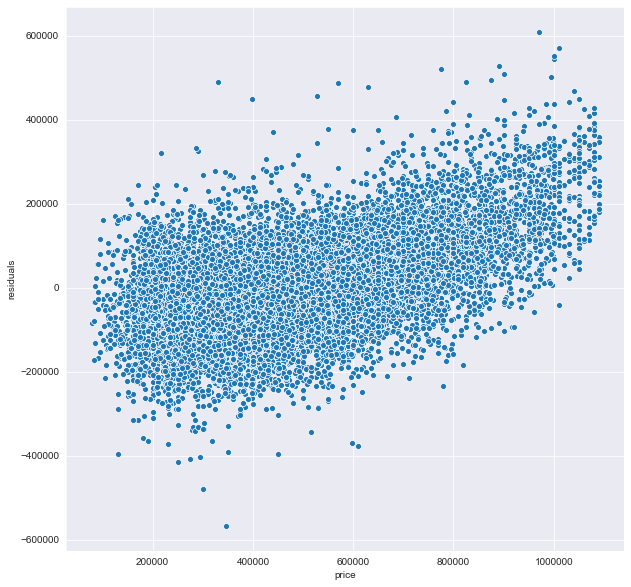

In [296]:
plt.figure(figsize= (10,10))

sns.scatterplot(y='residuals',x='price',data=resid)

In [297]:
X_shuff, y_shuff = shuffle(X, y)

In [298]:
X_shuff, y_shuff = shuffle(X, y)
cv_scores = cross_val_score(ols, X_shuff, y_shuff, scoring='r2', cv=5, n_jobs=-1) 
cv_scores.mean()

0.7022957428656987

In [401]:
rfe = RFE(ols, n_features_to_select=10, step=1, verbose=2)

In [434]:
X_all = df[x_cols]
rfe.fit(X_all, y)

Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


RFE(estimator=LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=2)

In [435]:
rfe.support_

array([False, False,  True, False, False,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True])

In [436]:
new_cols = X_all.columns[rfe.support_]

In [437]:
new_cols

Index(['sqft_living', 'condition', 'grade', 'Age_of_House', 'biggerliving',
       'distance_from_a_city', 'cond1', 'cond2', 'cond3', 'cond5'],
      dtype='object')

In [438]:
X_new = df[new_cols]

In [439]:
make_ols_sklearn(X_new, y)

train R2 score = 0.7137009996456368
test R2 score = 0.710439942344902
cv5 R2 score = 0.7113447985903598
cv10 R2 score = 0.7107728428849936
cv5 MSE score = -16231420411.615652
cv10  MSE score = -16235026757.78776


LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [440]:
cv5mae_scores = np.mean(cross_val_score(ols, X_new, y, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1) )
cv10mae_scores = np.mean(cross_val_score(ols, X_new, y, scoring='neg_mean_absolute_error', cv=10, n_jobs=-1) )
cv20mae_scores = np.mean(cross_val_score(ols, X_new, y, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1) )

# cv breaks your data into that many equal pieces 
cv5mae_scores,cv10mae_scores,cv20mae_scores

(-94022.14645558251, -94023.22220152478, -93943.34806891563)

In [189]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white